## Q1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import defaultdict

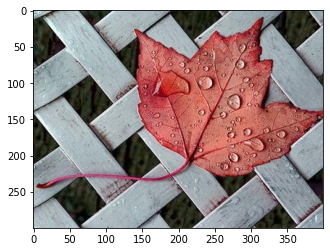

In [2]:
img = cv2.imread('data/leaf.png')
# pyplot is rgb so image is reversed before displaying
plt.imshow(img[:,:,::-1])

### using kmeans clustering to reduce number of colors to 85

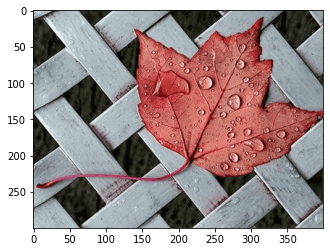

In [3]:
# 85 colors
k = 85

i = np.float32(img).reshape(-1,3)
condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.8)
ret,label,center = cv2.kmeans(i, k , None, condition, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
img85 = center[label.flatten()]
img85 = img85.reshape(img.shape)
plt.imshow(img85[:,:,::-1])

In [4]:
cv2.imwrite('data/leaf85.png', img85)

True

In [5]:
unique_colors = set()
freqs = defaultdict(int)

img2 = Image.open('data/leaf85.png')
w, h = img2.size
for x in range(w):
    for y in range(h):
        pixel = img2.getpixel((x, y))
        unique_colors.add(pixel)
        freqs[pixel] += 1

num_colors = len(unique_colors)
print('number of colors in processed image:', num_colors)

number of colors in processed image: 85


In [6]:
pnum = w*h
print('total pixels:', pnum)

total pixels: 120000


### Eqn 3

In [7]:
colors = list(unique_colors)
print(colors)

[(179, 193, 197), (189, 97, 90), (167, 179, 184), (209, 117, 104), (208, 81, 79), (95, 27, 29), (83, 84, 87), (95, 101, 106), (123, 34, 34), (235, 141, 132), (34, 36, 24), (219, 134, 124), (129, 141, 148), (234, 241, 243), (222, 110, 105), (183, 180, 184), (8, 7, 3), (160, 113, 125), (182, 106, 98), (55, 56, 46), (69, 5, 6), (197, 106, 97), (96, 69, 74), (205, 123, 113), (137, 68, 66), (108, 115, 121), (70, 65, 65), (190, 86, 128), (224, 166, 162), (192, 124, 114), (149, 153, 158), (124, 134, 141), (193, 67, 68), (194, 115, 105), (189, 161, 165), (113, 11, 12), (156, 161, 166), (164, 154, 159), (163, 87, 120), (147, 135, 140), (189, 86, 82), (158, 78, 72), (156, 168, 174), (141, 123, 129), (169, 64, 104), (148, 41, 76), (161, 174, 179), (188, 203, 207), (136, 139, 144), (174, 82, 76), (140, 152, 159), (44, 46, 34), (171, 64, 65), (207, 97, 93), (125, 118, 123), (210, 219, 222), (250, 183, 176), (156, 144, 150), (152, 32, 37), (172, 185, 190), (173, 94, 86), (180, 47, 48), (250, 210, 20

In [8]:
def cdist(c1, c2):
    ret = (c1[0] - c2[0])**2
    ret += (c1[1] - c2[1])**2
    ret += (c1[2] - c2[2])**2
    return np.sqrt(ret)

In [9]:
sals = defaultdict(float)
minsal = np.inf
maxsal = -1

for c1 in colors:
    val = 0
    for c2 in colors:
        val += (freqs[c2]/pnum) * cdist(c1, c2)
    sals[c1] = val
    if(val > maxsal):
        maxsal = val
    if(val < minsal):
        minsal = val

In [10]:
sals

defaultdict(float,
            {(179, 193, 197): 120.68699997880155,
             (189, 97, 90): 112.26579199902768,
             (167, 179, 184): 105.8990573952719,
             (209, 117, 104): 113.6803114824769,
             (208, 81, 79): 128.68875967337445,
             (95, 27, 29): 160.74948193455538,
             (83, 84, 87): 126.11453403419506,
             (95, 101, 106): 115.51534745713421,
             (123, 34, 34): 151.81009535400938,
             (235, 141, 132): 126.37067699145321,
             (34, 36, 24): 177.81486227691326,
             (219, 134, 124): 115.80525182133368,
             (129, 141, 148): 98.38299008665686,
             (234, 241, 243): 198.03328501510217,
             (222, 110, 105): 121.87129573041072,
             (183, 180, 184): 110.9509924910454,
             (8, 7, 3): 215.74413984367266,
             (160, 113, 125): 98.22186900466278,
             (182, 106, 98): 106.34890724253734,
             (55, 56, 46): 154.0707232383902,
             

In [11]:
print('min saliency:', minsal, '\nmax saliency:',maxsal)

min saliency: 94.27163815528469 
max saliency: 215.74413984367266


In [12]:
scaled = defaultdict(int)
for color in colors:
    scaled[color] = (sals[color] - minsal) / (maxsal - minsal) * 255

In [13]:
scaled

defaultdict(int,
            {(179, 193, 197): 55.452198410109084,
             (189, 97, 90): 37.77405722593344,
             (167, 179, 184): 24.408749840377844,
             (209, 117, 104): 40.74347386975011,
             (208, 81, 79): 72.2498167496937,
             (95, 27, 29): 139.5529846516244,
             (83, 84, 87): 66.84589792965761,
             (95, 101, 106): 44.595655779512725,
             (123, 34, 34): 120.78706194191585,
             (235, 141, 132): 67.38360360948614,
             (34, 36, 24): 175.37732289127436,
             (219, 134, 124): 45.20423477346895,
             (129, 141, 148): 8.630716647207434,
             (234, 241, 243): 217.82065555156666,
             (222, 110, 105): 57.938320062851886,
             (183, 180, 184): 35.01397679723232,
             (8, 7, 3): 255.0,
             (160, 113, 125): 8.292484740089163,
             (182, 106, 98): 25.353092876524048,
             (55, 56, 46): 125.53266364192773,
             (69, 5, 6): 200.3891

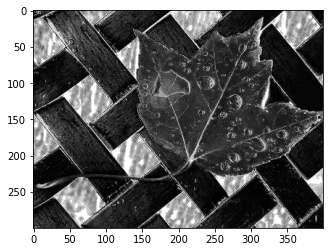

In [14]:
salmap3 = np.zeros((h, w), np.uint8)

for x in range(w):
    for y in range(h):
        pixel = img2.getpixel((x, y))
        salmap3[y][x] = scaled[pixel]

plt.imshow(salmap3, cmap='gray')

In [15]:
cv2.imwrite('output/leafmap.png', salmap3)

True

### Eqn 5

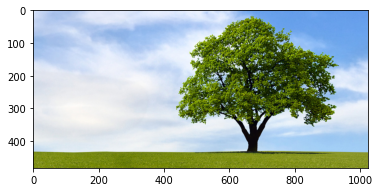

In [16]:
treeimg = cv2.imread('data/BigTree.jpg')
# pyplot is rgb so image is reversed before displaying
plt.imshow(treeimg[:,:,::-1])

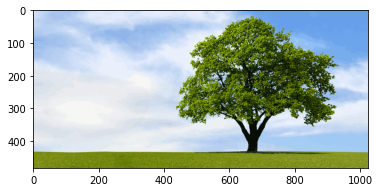

In [17]:
# 85 colors
k = 85

i = np.float32(treeimg).reshape(-1,3)
condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 60, 1)
ret,label,center = cv2.kmeans(i, k , None, condition, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
tree85 = center[label.flatten()]
tree85 = tree85.reshape(treeimg.shape)
plt.imshow(tree85[:,:,::-1])

In [18]:
cv2.imwrite('data/tree85.jpg', tree85)

True

In [19]:
unique2 = set()
freqs2 = defaultdict(int)

tree = Image.open('data/tree85.jpg')
w, h = tree.size
for x in range(w):
    for y in range(h):
        pixel = tree.getpixel((x, y))
        unique2.add(pixel)
        freqs2[pixel] += 1

num_colors = len(unique2)
print('number of colors in processed image:', num_colors)

number of colors in processed image: 40728


### we use the segmented image

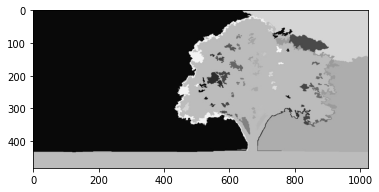

In [20]:
segimg = cv2.imread('data/segmented.jpg')
plt.imshow(segimg[:,:,::-1])